Below is an outline of a Jupyter Notebook with separate cells. The first cell loads rental.csv into a variable "data". Each subsequent cell defines one function and then immediately calls it (using the loaded "data"). Remove the master execution block. You can copy each cell into your notebook.

---

**Cell 1 – Import Libraries and Load Data**



In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FuncFormatter

# Load data from rental.csv
data = pd.read_csv("rentals.csv")
print("Loaded rental.csv with shape:", data.shape)

Loaded rental.csv with shape: (1950, 18)




---

**Cell 2 – Pre-Processing Function and Call**



In [71]:
def pre_processing(data):
    """
    Preprocess the data:
    - Print basic info and missing value counts.
    - Convert appropriate columns to numeric if needed.
    - Parse dates if a column appears to be a date.
    - Drop rows with excessive missing values.
    - Add new features for deeper analysis.
    """
    print("Initial data shape:", data.shape)
    print("\nData types:")
    print(data.dtypes)
    
    # Check for missing values
    missing = data.isnull().sum()
    print("\nMissing values per column:")
    print(missing)
    
    # Convert columns to appropriate types
    for col in ['Price', 'Bedrooms', 'Bathrooms', 'Lease Length (months)']:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # Handle missing categorical data
    for col in ['Property Type', 'Location', 'Region', 'Garden', 'Parking', 'LeaseCategory']:
        if col in data.columns and data[col].isnull().sum() > 0:
            mode_val = data[col].mode()[0]
            data[col].fillna(mode_val, inplace=True)
            print(f"Filled missing values in {col} with mode: {mode_val}")
    
    # Drop rows with critical missing data (e.g., Price or Location)
    critical_cols = ['Price', 'Location']
    data = data.dropna(subset=[col for col in critical_cols if col in data.columns])
    
    # Create additional useful features
    if 'Month' in data.columns:
        month_mapping = {name: num for num, name in enumerate(calendar.month_name) if num > 0}
        data['MonthNum'] = data['Month'].map(month_mapping)
        print("Created numeric month column 'MonthNum'")
    
    if 'Price' in data.columns and 'Bedrooms' in data.columns:
        data['PricePerBedroom'] = data['Price'] / data['Bedrooms'].replace(0, 1)  # Avoid division by zero
        print("Created/Verified 'PricePerBedroom' column")
        
        # Price category classification
        price_quantiles = data['Price'].quantile([0.1, 0.9]).tolist()
        data['PriceCategory'] = pd.cut(
            data['Price'], 
            bins=[0, price_quantiles[0], price_quantiles[1], float('inf')],
            labels=['Budget', 'Mid-Range', 'Premium']
        )
        print("Created 'PriceCategory' classification")
    
    print("\nPre-processing complete. Data shape after cleaning:", data.shape)
    return data

# Call the function
data = pre_processing(data)

Initial data shape: (1950, 20)

Data types:
ListingID                   int64
Month                      object
Quarter                     int64
Page                        int64
Price                     float64
Currency                   object
Property Type              object
Location                   object
Bedrooms                    int64
Bathrooms                   int64
Parking                    object
Garden                     object
Lease Length (months)     float64
Contact                    object
Region                     object
DublinArea                 object
PricePerBedroom           float64
LeaseCategory              object
MonthNum                    int64
PriceCategory            category
dtype: object

Missing values per column:
ListingID                 0
Month                     0
Quarter                   0
Page                      0
Price                     0
Currency                  0
Property Type             0
Location                  0
Bedrooms  



---

**Cell 3 – Descriptive Statistics Function and Call**



In [77]:
def descriptive_stats(data):
    """Print descriptive statistics for the dataset."""
    print("\nDescriptive Statistics:")
    print(data.describe(include='all'))

# Call the function
descriptive_stats(data)


Descriptive Statistics:
          ListingID      Month      Quarter         Page        Price  \
count   1950.000000       1950  1950.000000  1950.000000  1950.000000   
unique          NaN         12          NaN          NaN          NaN   
top             NaN  September          NaN          NaN          NaN   
freq            NaN        196          NaN          NaN          NaN   
mean     245.587692        NaN     2.433846    12.758974  2495.179487   
std      142.927991        NaN     1.097823     7.148528  1339.898736   
min        1.000000        NaN     1.000000     1.000000   670.000000   
25%      122.250000        NaN     1.000000     7.000000  1480.000000   
50%      244.000000        NaN     2.000000    13.000000  2090.000000   
75%      366.000000        NaN     3.000000    19.000000  3175.000000   
max      510.000000        NaN     4.000000    26.000000  7640.000000   

       Currency Property Type                      Location     Bedrooms  \
count      1950       

In [91]:
unnecasary_columns = ['ListingID', 'Page', 'Quarter']



---

**Cell 4 – Plot Numeric Distribution Function and Call**



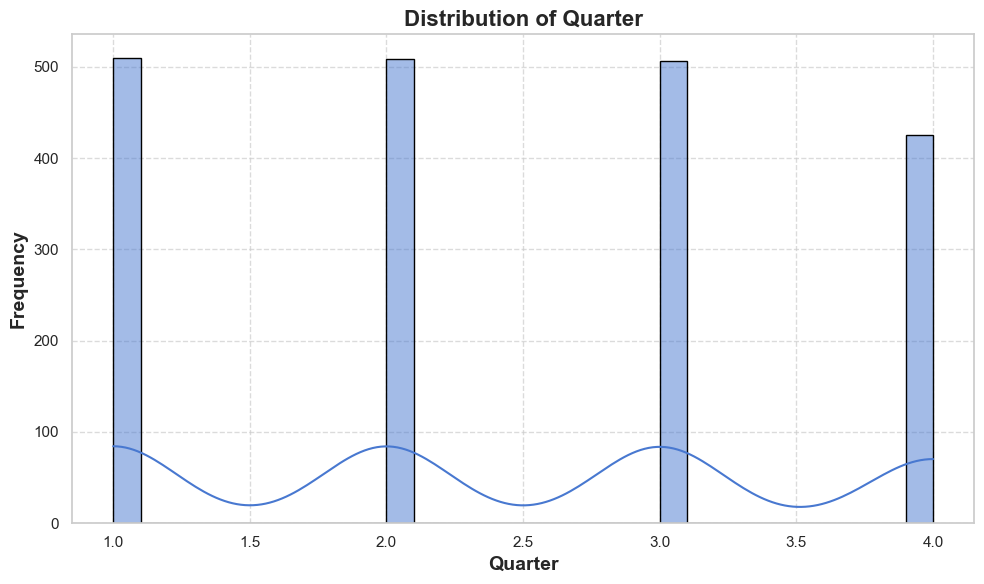

Histogram for Quarter


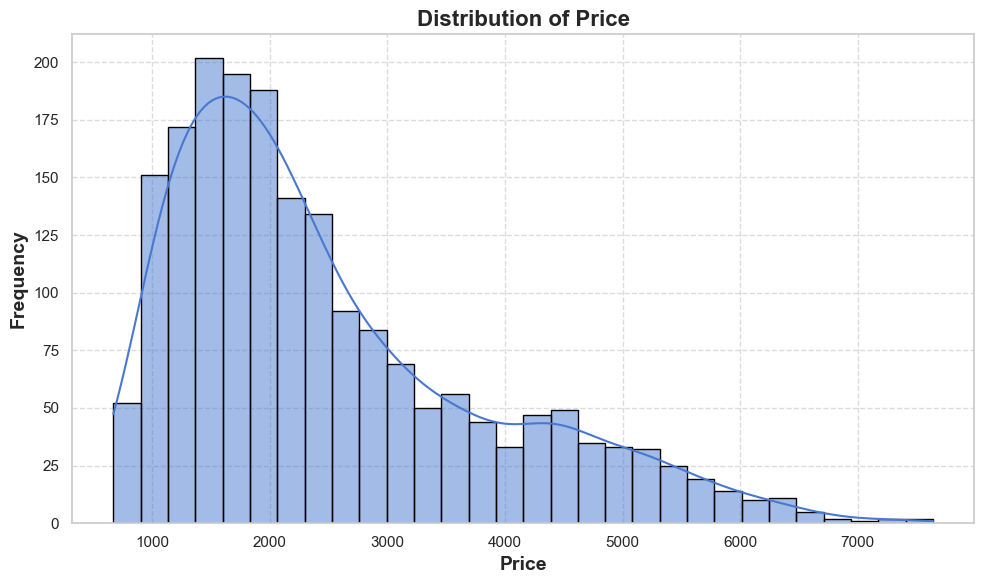

Histogram for Price


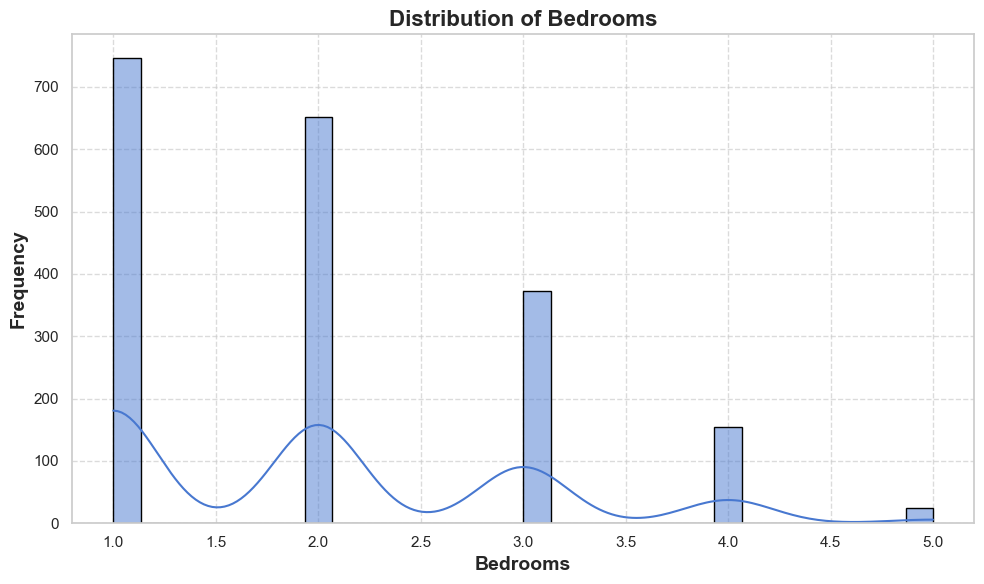

Histogram for Bedrooms


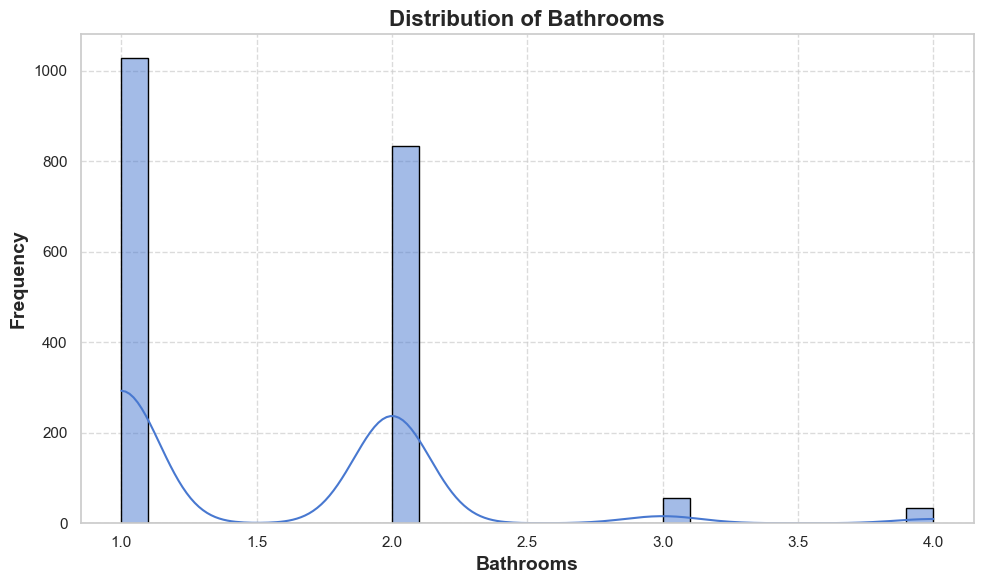

Histogram for Bathrooms


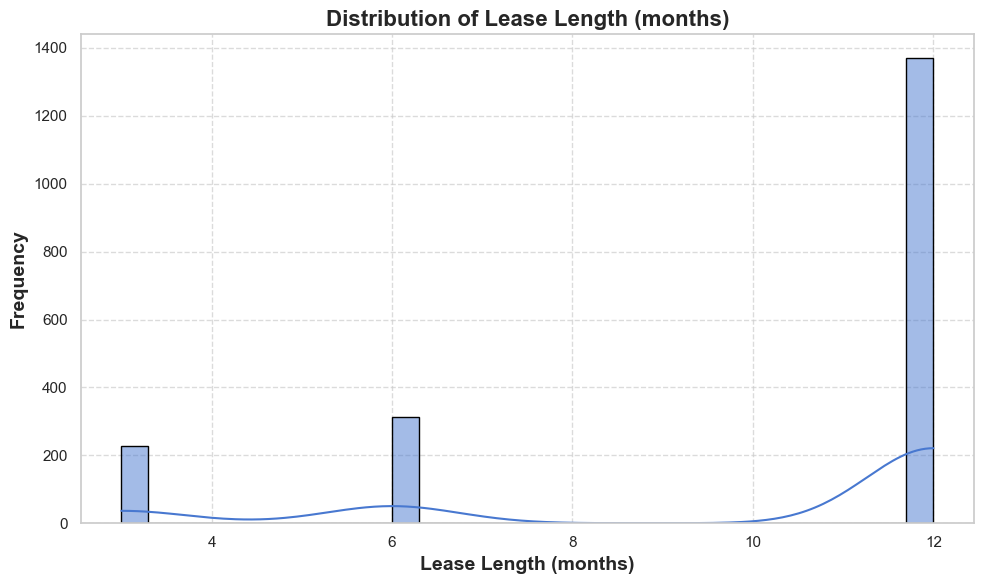

Histogram for Lease Length (months)


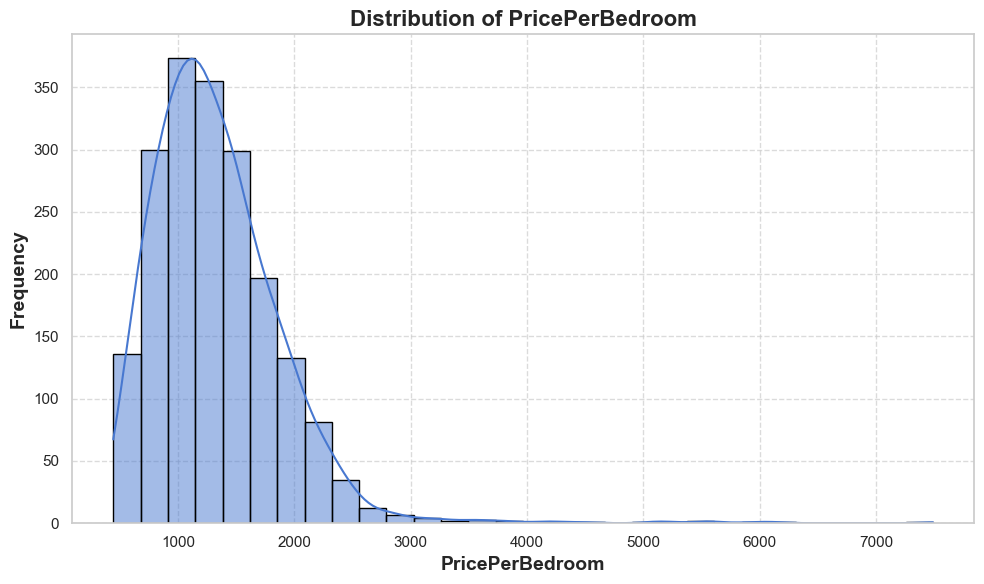

Histogram for PricePerBedroom


In [89]:
def plot_numeric_distribution(data):
    """Plot enhanced histograms for numeric columns excluding unnecasary columns."""
    sns.set_theme(style="whitegrid", palette="muted")  # Updated theme and palette
    
    # Remove columns listed in unnecasary_columns
    numeric_cols = [col for col in data.select_dtypes(include=[np.number]).columns if col not in unnecasary_columns]
    
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        # Use seaborn's histplot with KDE for a fancier visual
        sns.histplot(data[col], bins=30, kde=True, edgecolor='black', color=sns.color_palette("muted")[0])
        plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=14, fontweight='bold')
        plt.ylabel('Frequency', fontsize=14, fontweight='bold')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print(f"Histogram for {col}")
        plt.close()

# Call the function
plot_numeric_distribution(data)



---

**Cell 5 – Plot Boxplots Function and Call**



Boxplot for Price:
→ Found 53 outlier(s) which is 2.72% of the data.
Inference: Price has only minimal outliers.


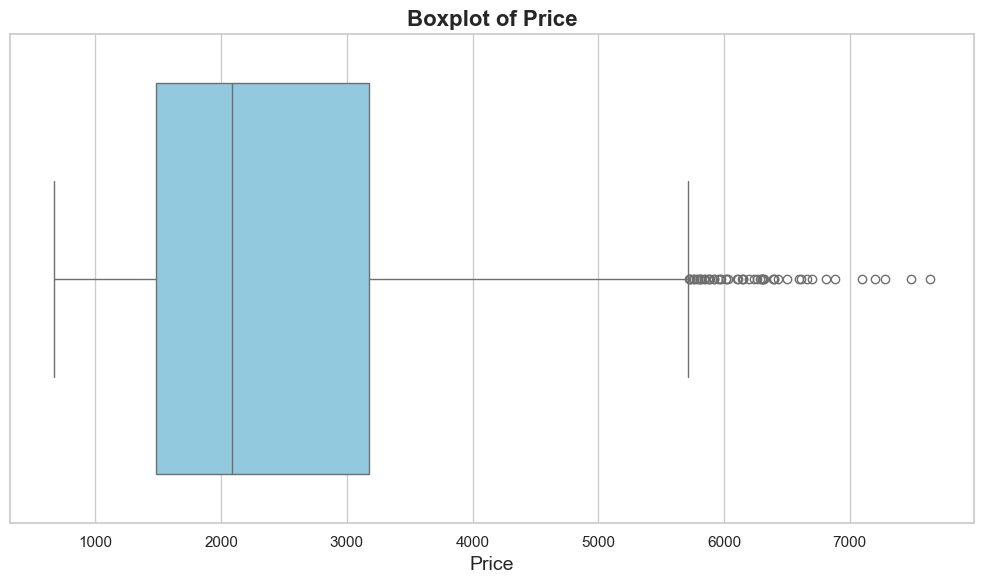

Boxplot for Bedrooms:
→ Found 0 outlier(s) which is 0.00% of the data.
Inference: Bedrooms has only minimal outliers.


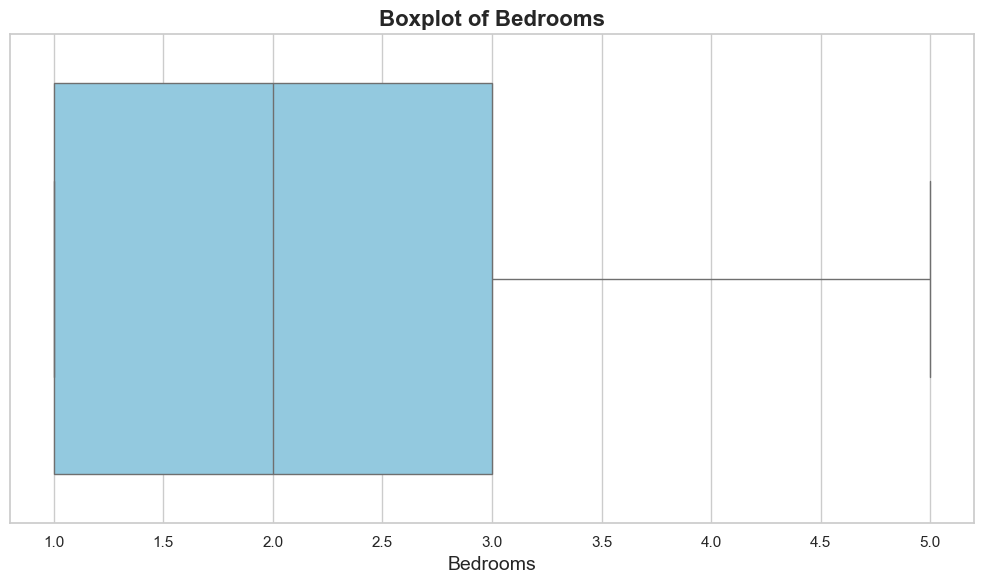

Boxplot for Bathrooms:
→ Found 33 outlier(s) which is 1.69% of the data.
Inference: Bathrooms has only minimal outliers.


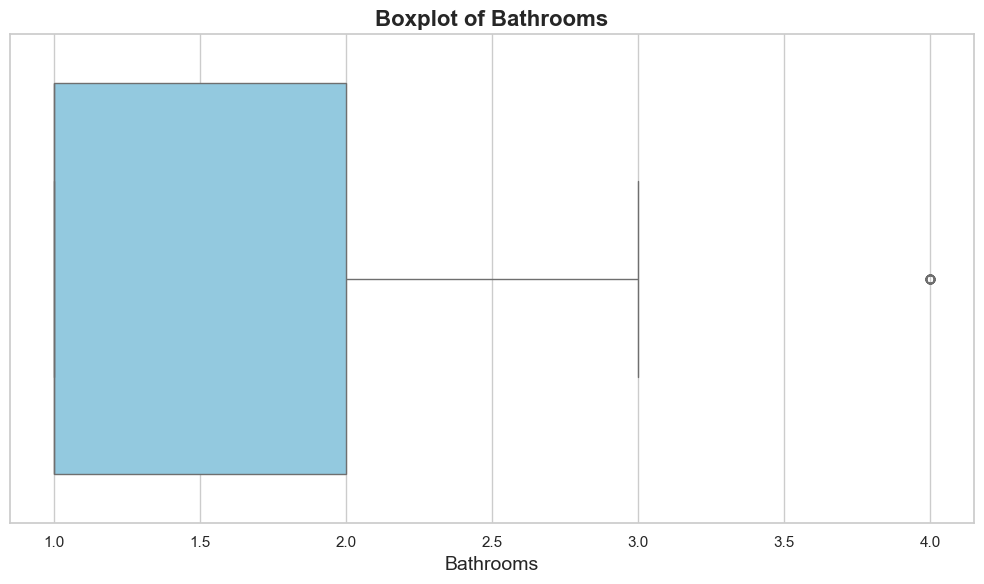

Boxplot for Lease Length (months):
→ Found 0 outlier(s) which is 0.00% of the data.
Inference: Lease Length (months) has only minimal outliers.


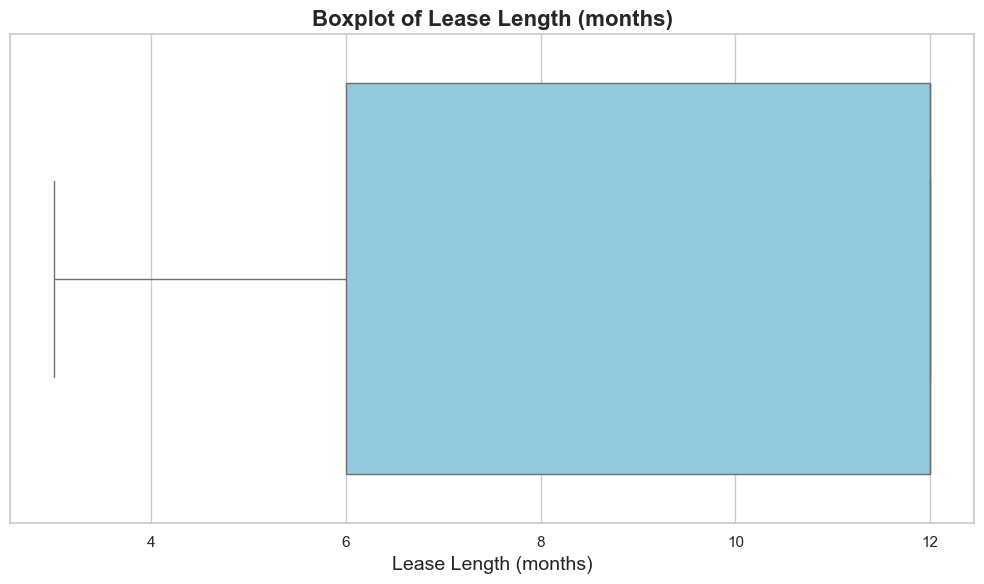

Boxplot for PricePerBedroom:
→ Found 35 outlier(s) which is 1.79% of the data.
Inference: PricePerBedroom has only minimal outliers.


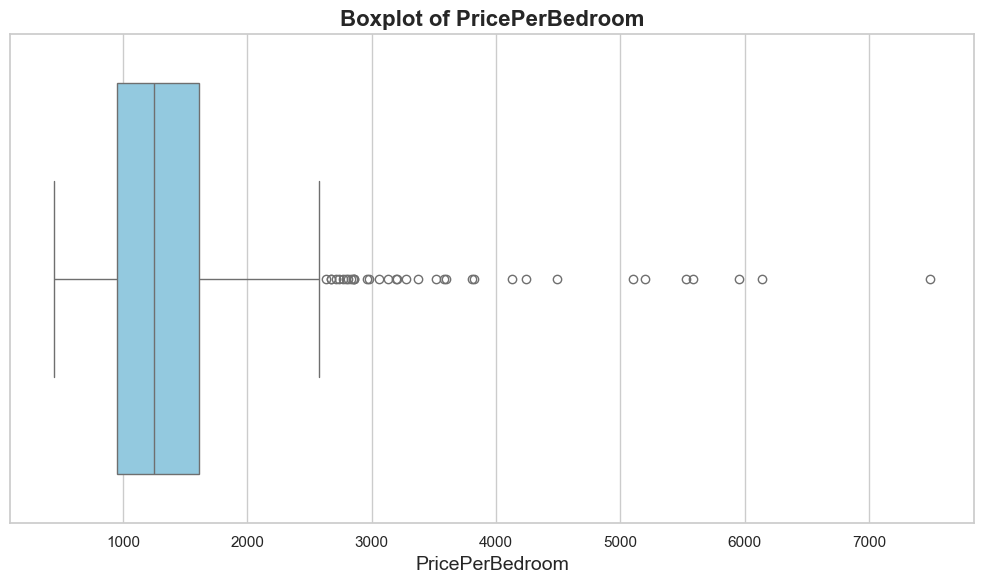

In [92]:
def plot_boxplots(data):
    """Plot fancy boxplots for numeric columns excluding unnecasary columns and add outlier inferences."""
    sns.set_theme(style="whitegrid", palette="pastel")
    
    # Exclude columns specified in unnecasary_columns
    numeric_cols = [col for col in data.select_dtypes(include=[np.number]).columns if col not in unnecasary_columns]
    
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(x=data[col], color='skyblue')
        plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=14)
        plt.tight_layout()
        
        # Calculate outliers using the IQR method
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        n_outliers = len(outliers)
        total = data[col].dropna().shape[0]
        pct = (n_outliers / total * 100) if total != 0 else 0
        
        print(f"Boxplot for {col}:")
        print(f"→ Found {n_outliers} outlier(s) which is {pct:.2f}% of the data.")
        if pct > 5:
            print(f"Inference: {col} has significant outliers that may affect the analysis.")
        else:
            print(f"Inference: {col} has only minimal outliers.")
        
        plt.show()
        plt.close()

# Call the function
plot_boxplots(data)

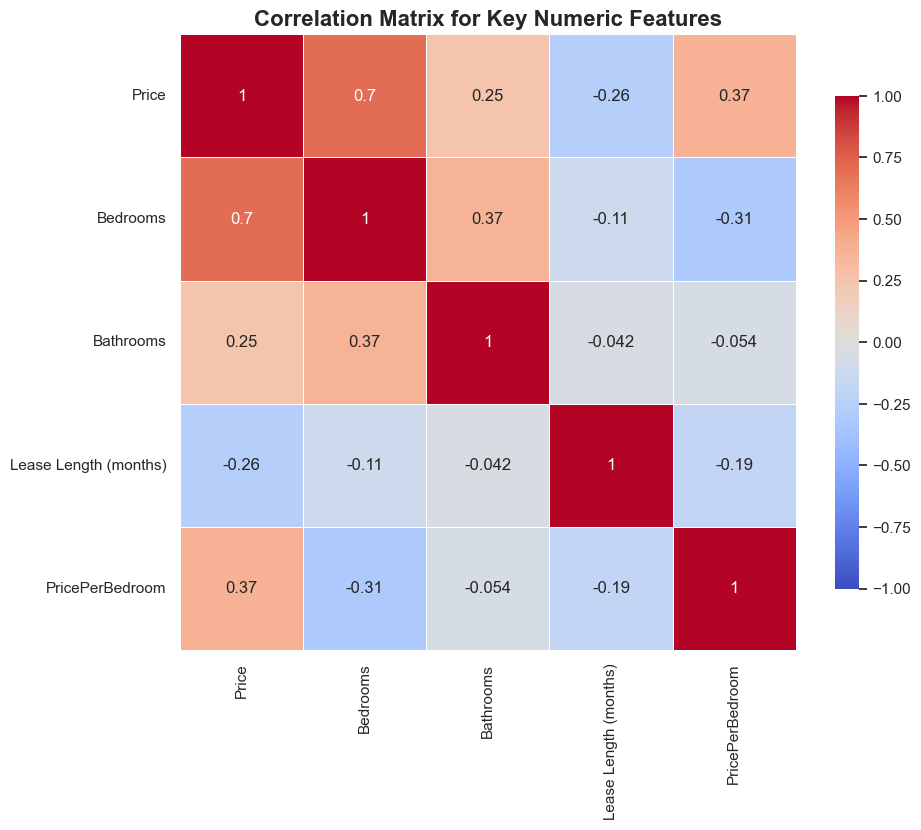


Inferences from the correlation matrix:
1. Price and Bedrooms have a strong positive correlation (≈0.70), indicating that properties with more bedrooms tend to be priced higher.
2. Price and Bathrooms show a low to moderate positive correlation (≈0.25), suggesting only a modest impact of bathroom count on pricing.
3. Lease Length (months) has a weak negative correlation with Price (≈-0.26), which may imply that shorter lease lengths are associated with higher prices.
4. PricePerBedroom is moderately positively correlated with Price (≈0.37) and negatively correlated with Bedrooms (≈-0.31), indicating that as the number of bedrooms increases, the price per bedroom tends to decrease.


In [102]:
# Plotting the correlation matrix with a fancy heatmap
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix for Key Numeric Features", fontsize=16, fontweight='bold')
plt.show()

# Writing inferences based on the correlation matrix
print("\nInferences from the correlation matrix:")
print("1. Price and Bedrooms have a strong positive correlation (≈0.70), indicating that properties with more bedrooms tend to be priced higher.")
print("2. Price and Bathrooms show a low to moderate positive correlation (≈0.25), suggesting only a modest impact of bathroom count on pricing.")
print("3. Lease Length (months) has a weak negative correlation with Price (≈-0.26), which may imply that shorter lease lengths are associated with higher prices.")
print("4. PricePerBedroom is moderately positively correlated with Price (≈0.37) and negatively correlated with Bedrooms (≈-0.31), indicating that as the number of bedrooms increases, the price per bedroom tends to decrease.")



---

**Cell 6 – Plot Correlation Function and Call**



Correlation between encoded Location and Price: 0.03


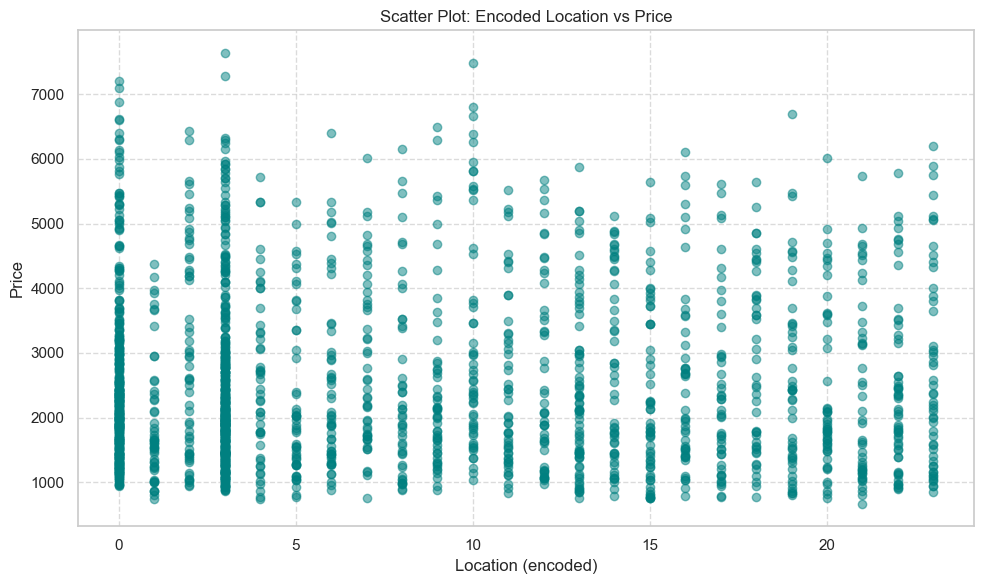


Average Price by Region:
                          mean  count
Region                               
North Co Dublin    2621.489362     47
Dublin City South  2553.798768    974
South Co Dublin    2447.115385     52
Dublin City North  2426.157355    877


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3648613844.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_prices.index, y=region_prices['mean'], palette="viridis")


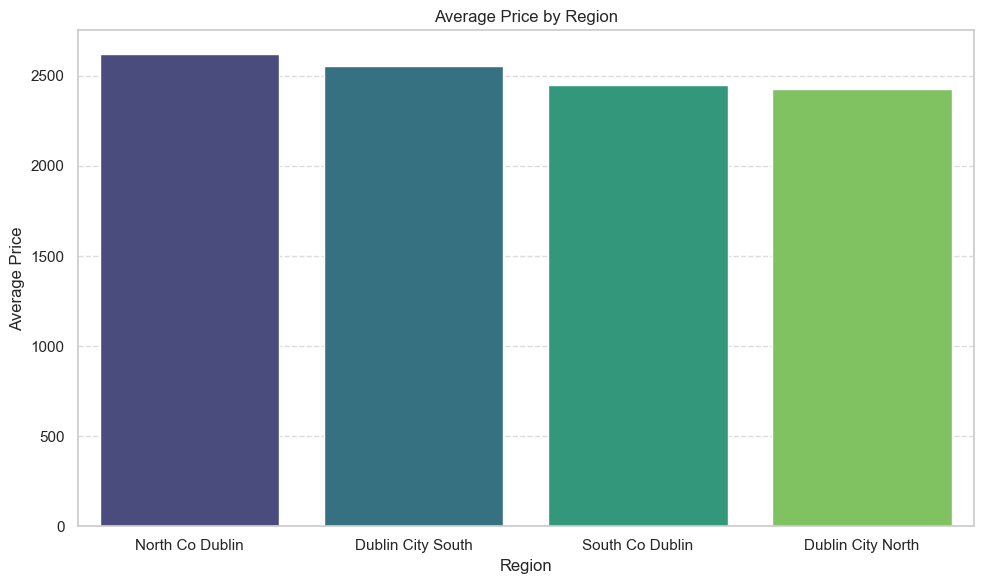

/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3648613844.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Price', data=data, palette="coolwarm")


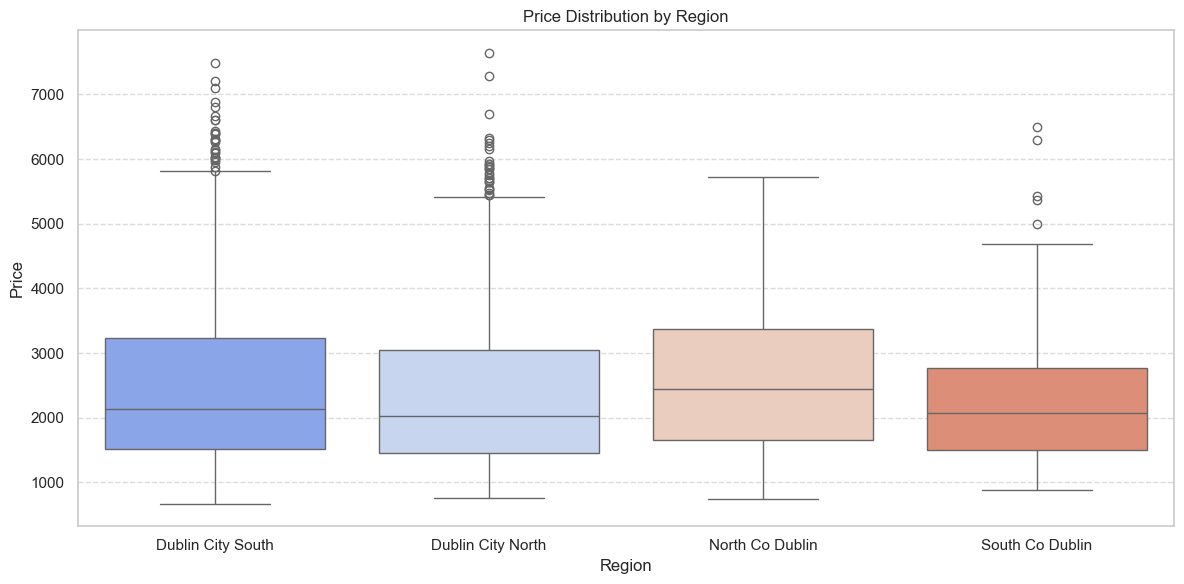

In [97]:
def analyze_location_price_correlation(data):
    """
    Analyze the association between Location and Price, and visualize how regional pricing differs.
    This function:
      - Computes the correlation between encoded Location values and Price.
      - Plots a scatter plot of encoded Location versus Price.
      - Displays a bar chart of average Price by Region.
      - Shows a boxplot of Price distributions by Region.
    """
    # Correlation analysis for Location and Price by encoding Location
    if 'Location' in data.columns and 'Price' in data.columns:
        codes, uniques = pd.factorize(data['Location'])
        corr_val = np.corrcoef(codes, data['Price'])[0, 1]
        print(f"Correlation between encoded Location and Price: {corr_val:.2f}")
        
        plt.figure(figsize=(10,6))
        plt.scatter(codes, data['Price'], alpha=0.5, color="teal")
        plt.xlabel('Location (encoded)')
        plt.ylabel('Price')
        plt.title('Scatter Plot: Encoded Location vs Price')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show("location_price_scatter.png")
        plt.close()
    
    # Regional pricing analysis: average price by Region
    if 'Region' in data.columns and 'Price' in data.columns:
        region_prices = data.groupby('Region')['Price'].agg(['mean', 'count']).sort_values('mean', ascending=False)
        print("\nAverage Price by Region:")
        print(region_prices)
        
        plt.figure(figsize=(10,6))
        sns.barplot(x=region_prices.index, y=region_prices['mean'], palette="viridis")
        plt.title('Average Price by Region')
        plt.xlabel('Region')
        plt.ylabel('Average Price')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show("region_average_price.png")
        plt.close()
        
        # Additional visualization: Boxplot for price distribution by Region
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Region', y='Price', data=data, palette="coolwarm")
        plt.title('Price Distribution by Region')
        plt.xlabel('Region')
        plt.ylabel('Price')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show("region_price_boxplot.png")
        plt.close()

analyze_location_price_correlation(data)

## Here we can see that the basic price of a house is hihgly dependent on the bedrooms it has 



---

**Cell 7 – Plot Categorical Counts Function and Call**



/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


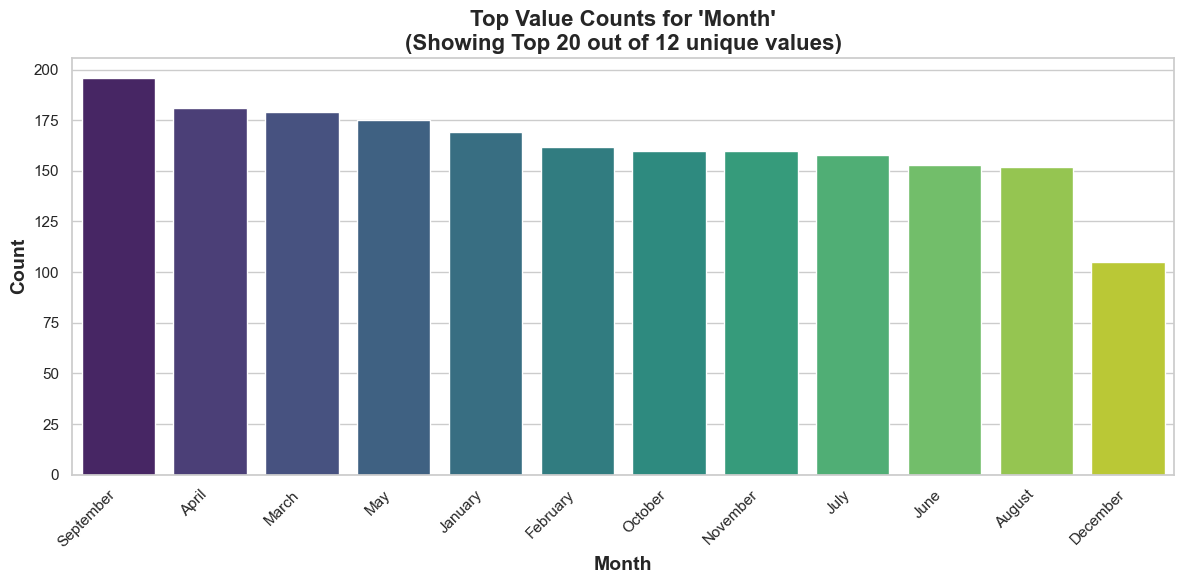

Inference for 'Month':
→ The category 'September' is the most frequent with 196 counts, representing 10.05% of the total entries.
   The distribution appears relatively balanced among the top categories.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


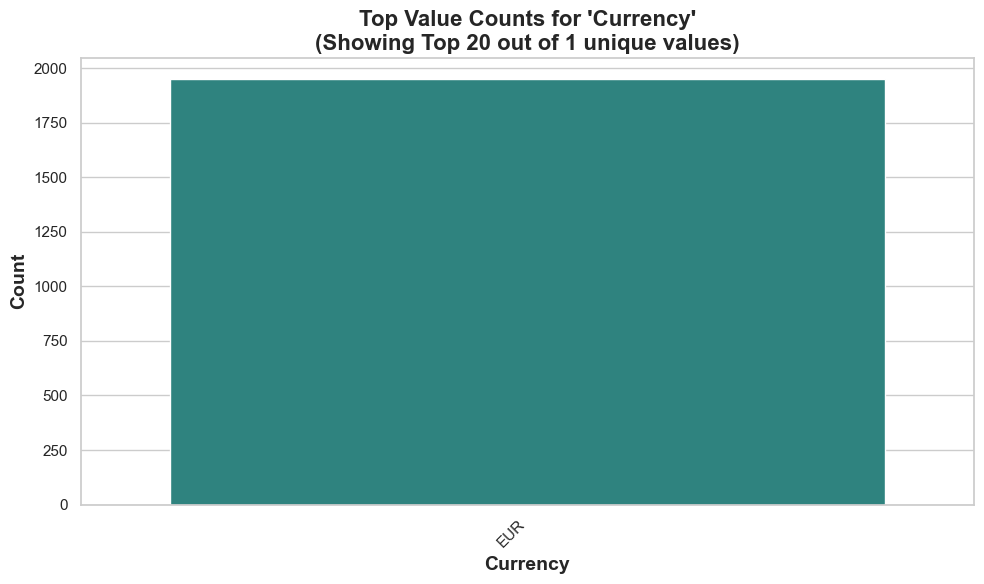

Inference for 'Currency':
→ The category 'EUR' is the most frequent with 1950 counts, representing 100.00% of the total entries.
   This indicates a high concentration in a single category, which might affect diversity in the analysis.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


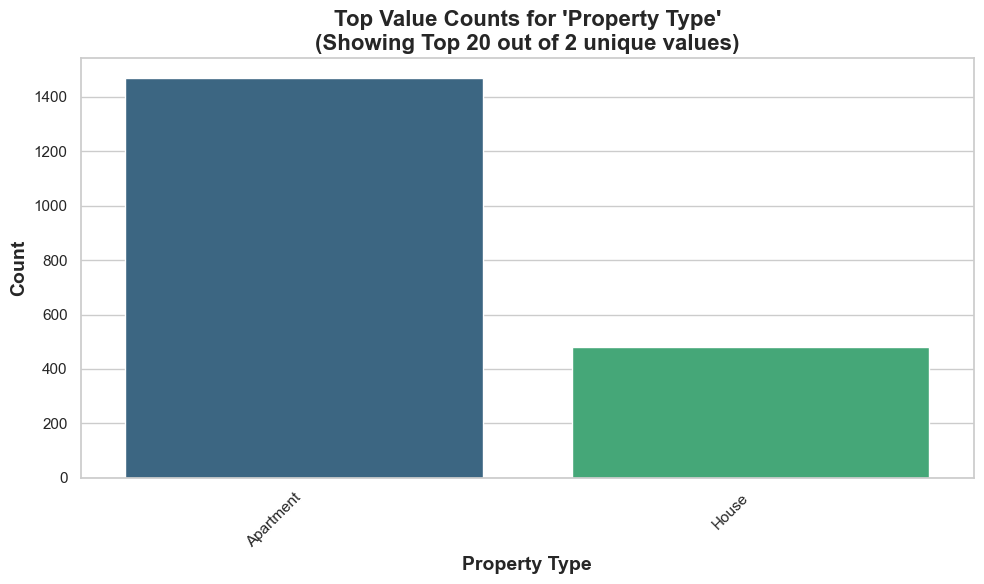

/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


Inference for 'Property Type':
→ The category 'Apartment' is the most frequent with 1470 counts, representing 75.38% of the total entries.
   This indicates a high concentration in a single category, which might affect diversity in the analysis.
--------------------------------------------------------------------------------


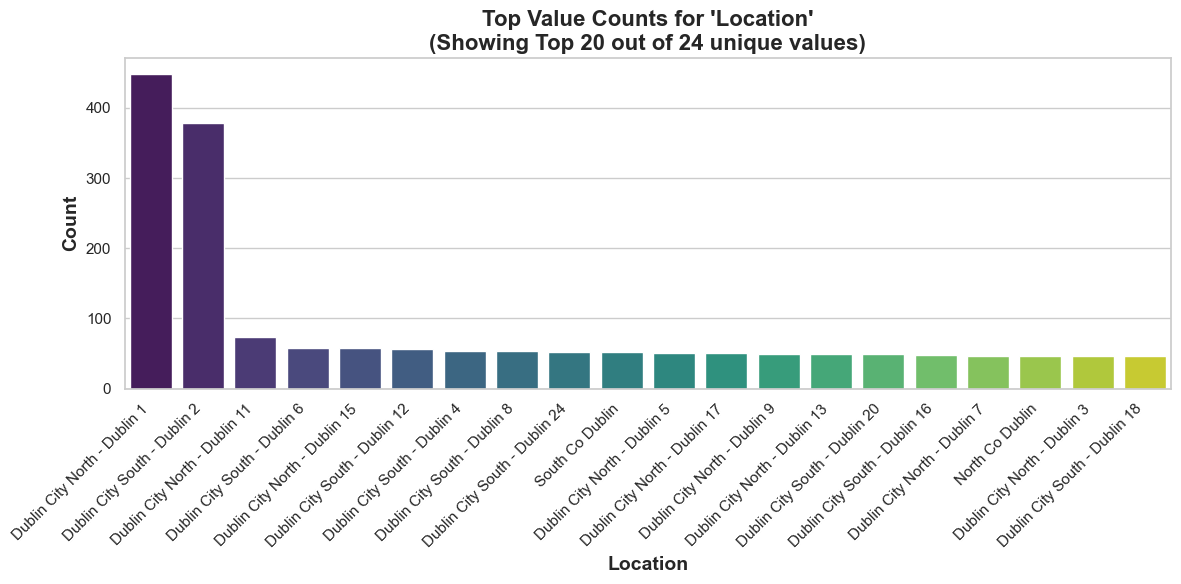

Inference for 'Location':
→ The category 'Dublin City North - Dublin 1' is the most frequent with 449 counts, representing 23.03% of the total entries.
   The distribution appears relatively balanced among the top categories.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


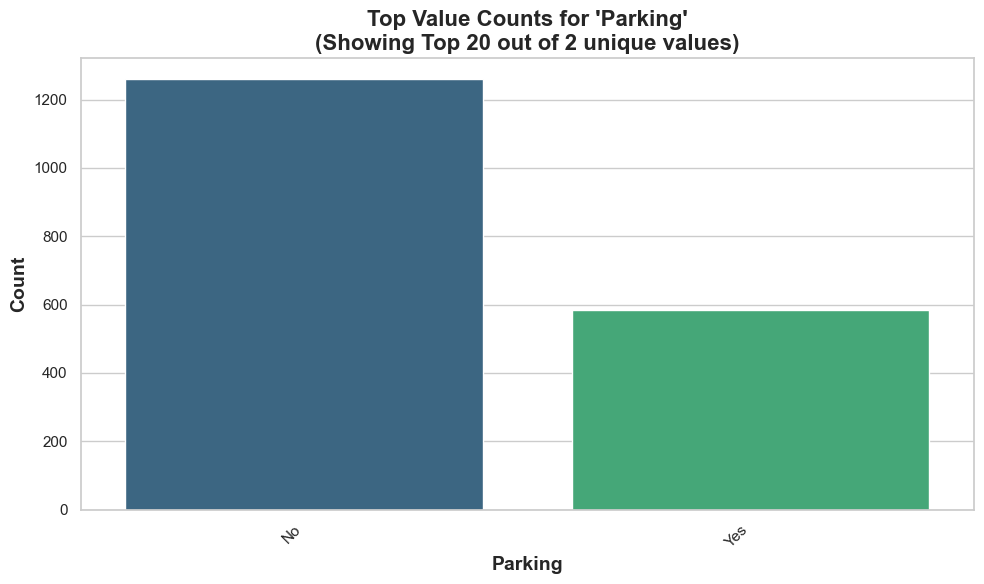

Inference for 'Parking':
→ The category 'No' is the most frequent with 1259 counts, representing 68.35% of the total entries.
   This indicates a high concentration in a single category, which might affect diversity in the analysis.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


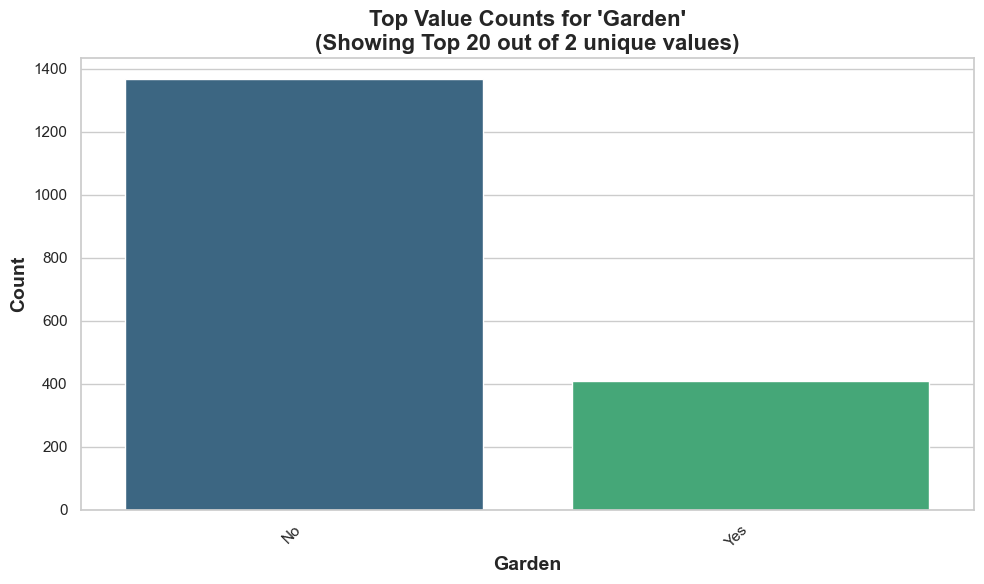

Inference for 'Garden':
→ The category 'No' is the most frequent with 1366 counts, representing 77.04% of the total entries.
   This indicates a high concentration in a single category, which might affect diversity in the analysis.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


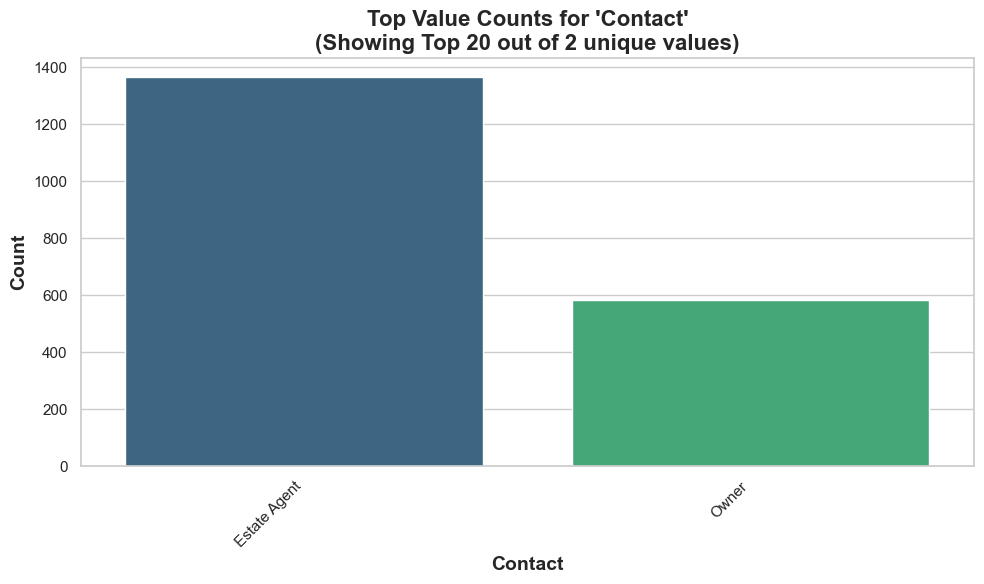

Inference for 'Contact':
→ The category 'Estate Agent' is the most frequent with 1365 counts, representing 70.00% of the total entries.
   This indicates a high concentration in a single category, which might affect diversity in the analysis.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


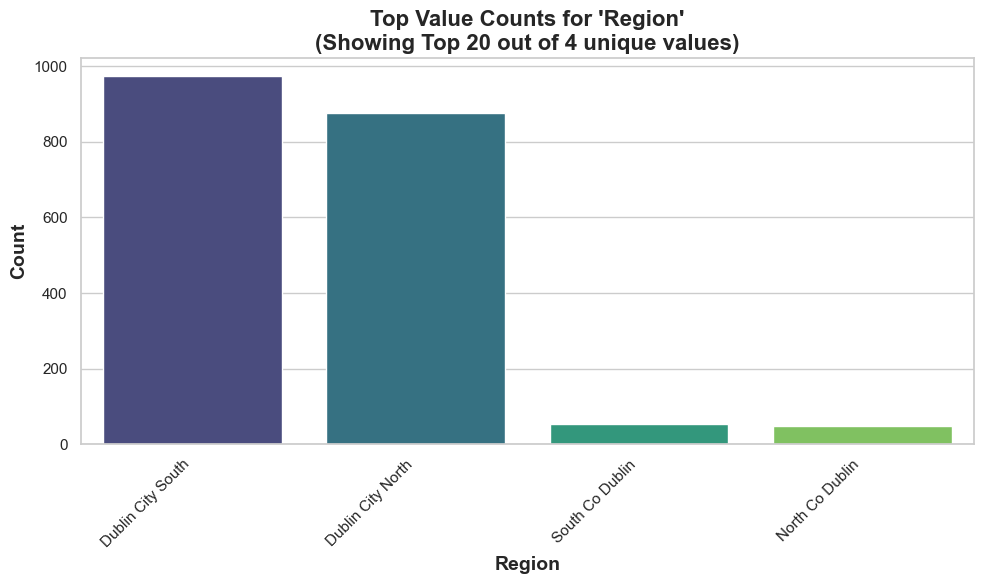

Inference for 'Region':
→ The category 'Dublin City South' is the most frequent with 974 counts, representing 49.95% of the total entries.
   The distribution appears relatively balanced among the top categories.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


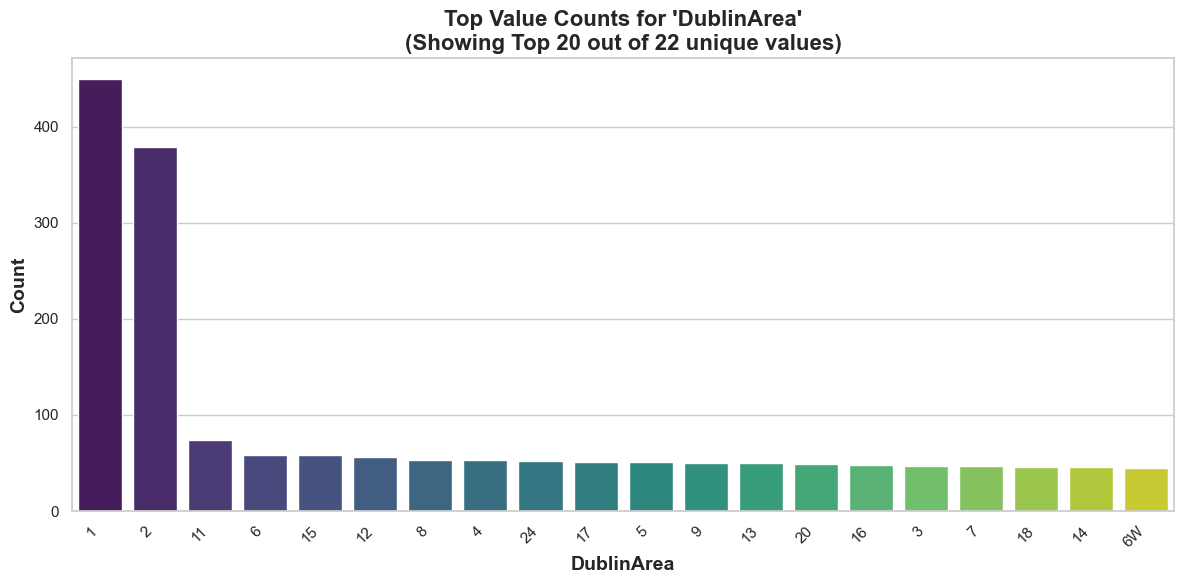

Inference for 'DublinArea':
→ The category '1' is the most frequent with 449 counts, representing 24.26% of the total entries.
   The distribution appears relatively balanced among the top categories.
--------------------------------------------------------------------------------


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3219842974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)


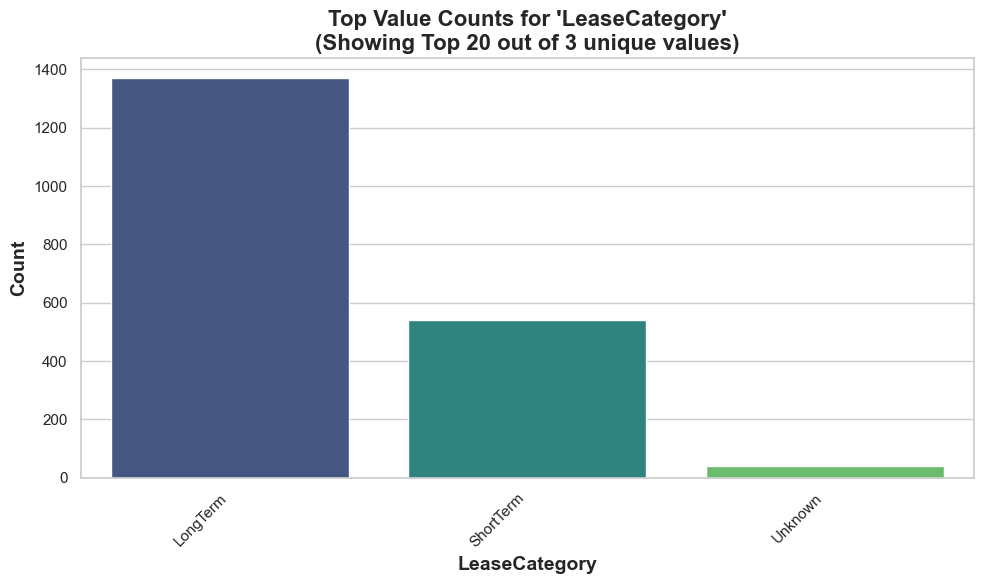

Inference for 'LeaseCategory':
→ The category 'LongTerm' is the most frequent with 1371 counts, representing 70.31% of the total entries.
   This indicates a high concentration in a single category, which might affect diversity in the analysis.
--------------------------------------------------------------------------------


In [103]:
def plot_categorical_counts(data):
    """Plot fancy bar charts for categorical column value counts and write inferences."""
    sns.set_theme(style="whitegrid", palette="muted")
    
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        counts = data[col].value_counts()
        fig, ax = plt.subplots(figsize=(12 if len(counts) > 10 else 10, 6))
        sns.barplot(x=counts.index[:20], y=counts.values[:20], palette="viridis", ax=ax)
        ax.set_title(f"Top Value Counts for '{col}'\n(Showing Top 20 out of {len(counts)} unique values)", 
                     fontsize=16, fontweight='bold')
        ax.set_xlabel(col, fontsize=14, fontweight='bold')
        ax.set_ylabel('Count', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show(f"{col}_value_counts.png")
        plt.close()
        
        # Write inferences based on counts
        dominant_category = counts.idxmax()
        dominant_count = counts.max()
        total = counts.sum()
        pct = (dominant_count / total) * 100
        print(f"Inference for '{col}':")
        print(f"→ The category '{dominant_category}' is the most frequent with {dominant_count} counts, representing {pct:.2f}% of the total entries.")
        if pct > 60:
            print("   This indicates a high concentration in a single category, which might affect diversity in the analysis.")
        else:
            print("   The distribution appears relatively balanced among the top categories.")
        print("-" * 80)

# Call the function
plot_categorical_counts(data)



---

**Cell 10 – Analyze Seasonal Trends Function and Call**




===== SEASONAL RENTAL TRENDS ANALYSIS =====

Average Rental Prices by Month:
        Month         mean  count          std
4     January  2552.840237    169  1396.684076
3    February  2341.604938    162  1239.807596
7       March  2268.547486    179  1250.406276
0       April  2511.657459    181  1343.378210
8         May  2622.457143    175  1419.941806
6        June  2286.993464    153  1292.774497
5        July  2438.797468    158  1248.618782
1      August  2314.013158    152  1171.062381
11  September  2610.663265    196  1405.685185
10    October  2572.125000    160  1421.858288
9    November  2922.937500    160  1484.501313
2    December  2450.952381    105  1181.853599
Monthly price trends chart


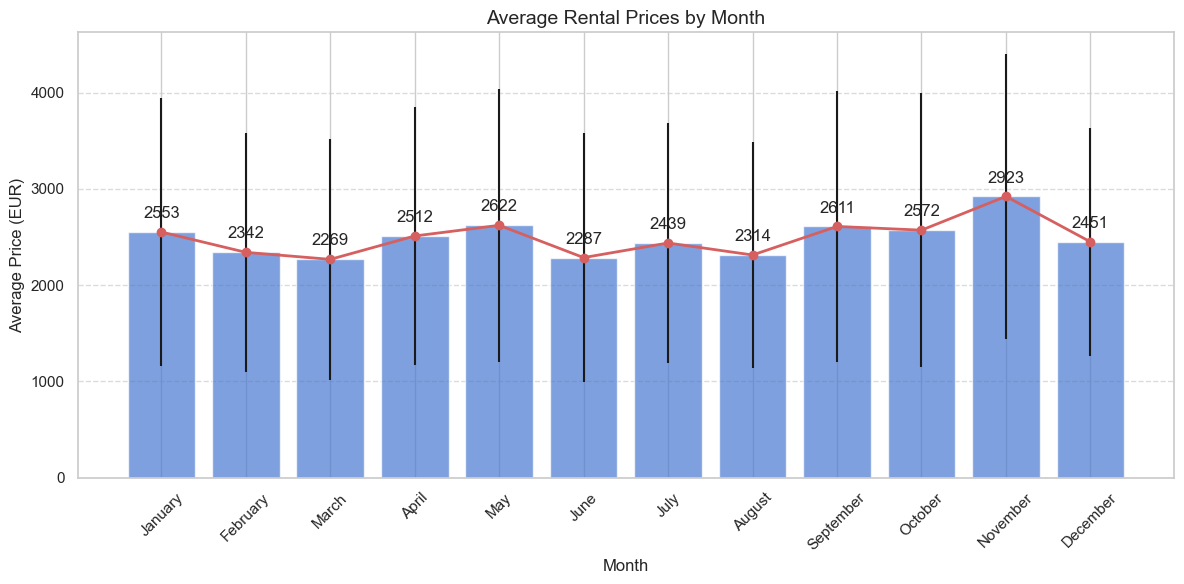


INSIGHT: Peak season in November (Avg: 2922.94 EUR), Off-peak in March (Avg: 2268.55 EUR). Potential savings: 28.8%.


In [106]:
def analyze_seasonal_trends(data):
    """Analyze rental price trends by month and quarter."""
    print("\n===== SEASONAL RENTAL TRENDS ANALYSIS =====")
    if 'Month' in data.columns and 'Price' in data.columns:
        monthly_avg = data.groupby('Month')['Price'].agg(['mean', 'count', 'std']).reset_index()
        monthly_avg['MonthNum'] = monthly_avg['Month'].map({name: num for num, name in enumerate(calendar.month_name) if num > 0})
        monthly_avg = monthly_avg.sort_values('MonthNum')
        
        print("\nAverage Rental Prices by Month:")
        print(monthly_avg[['Month', 'mean', 'count', 'std']])
        
        plt.figure(figsize=(12, 6))
        plt.bar(monthly_avg['Month'], monthly_avg['mean'], yerr=monthly_avg['std'], alpha=0.7)
        plt.plot(monthly_avg['Month'], monthly_avg['mean'], 'ro-', linewidth=2)
        plt.title('Average Rental Prices by Month', fontsize=14)
        plt.ylabel('Average Price (EUR)')
        plt.xlabel('Month')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        for x, y in zip(monthly_avg['Month'], monthly_avg['mean']):
            plt.annotate(f"{y:.0f}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')
        plt.tight_layout()
        print("Monthly price trends chart")
        plt.show("monthly_price_trends.png")
        plt.close()
        
        max_month = monthly_avg.loc[monthly_avg['mean'].idxmax()]
        min_month = monthly_avg.loc[monthly_avg['mean'].idxmin()]
        price_diff_pct = ((max_month['mean'] - min_month['mean']) / min_month['mean']) * 100
        print(f"\nINSIGHT: Peak season in {max_month['Month']} (Avg: {max_month['mean']:.2f} EUR), "
              f"Off-peak in {min_month['Month']} (Avg: {min_month['mean']:.2f} EUR). "
              f"Potential savings: {price_diff_pct:.1f}%.")

# Call the function
analyze_seasonal_trends(data)



---

**Cell 11 – Analyze Property Types Function and Call**




===== PROPERTY TYPE ANALYSIS =====

Pricing Statistics by Property Type:
                      mean  median  count
Property Type                            
Apartment      1973.251701  1790.0   1470
House          4093.583333  4070.0    480
Property type price comparison


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/2052605662.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_price.index, y=prop_price['mean'], palette='viridis')


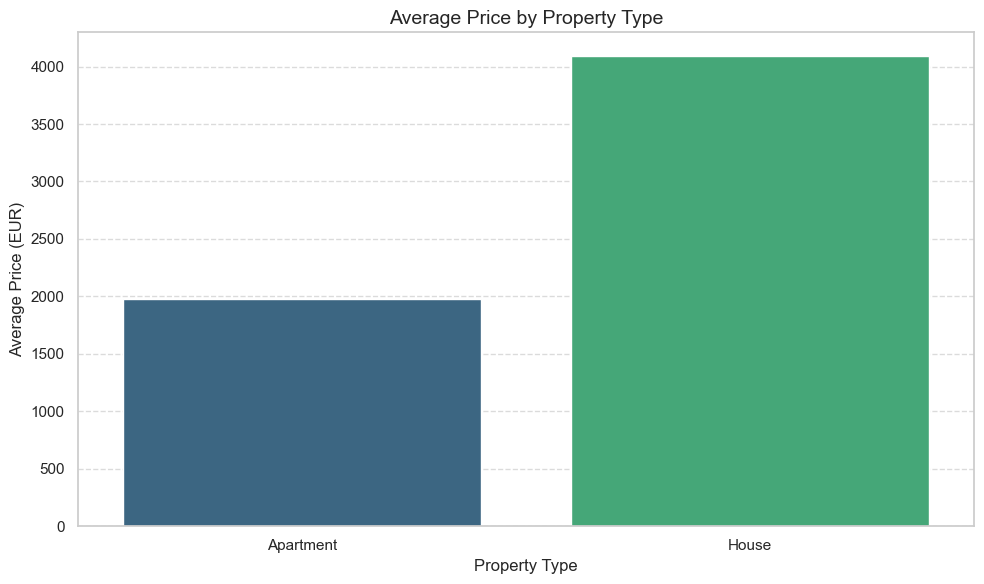


Average Bedrooms and Bathrooms by Property Type:
               Bedrooms  Bathrooms
Property Type                     
Apartment      1.602721   1.401361
House          3.229167   1.941667


In [107]:
def analyze_property_types(data):
    """Analyze differences between property types."""
    print("\n===== PROPERTY TYPE ANALYSIS =====")
    if 'Property Type' in data.columns and 'Price' in data.columns:
        prop_price = data.groupby('Property Type')['Price'].agg(['mean', 'median', 'count'])
        print("\nPricing Statistics by Property Type:")
        print(prop_price)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=prop_price.index, y=prop_price['mean'], palette='viridis')
        plt.title('Average Price by Property Type', fontsize=14)
        plt.xlabel('Property Type')
        plt.ylabel('Average Price (EUR)')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        print("Property type price comparison")
        plt.show("property_type_prices.png")
        plt.close()

        if 'Bedrooms' in data.columns and 'Bathrooms' in data.columns:
            bed_bath = data.groupby('Property Type').agg({'Bedrooms': 'mean', 'Bathrooms': 'mean'})
            print("\nAverage Bedrooms and Bathrooms by Property Type:")
            print(bed_bath)

# Call the function
analyze_property_types(data)



---

**Cell 12 – Analyze Location Pricing Function and Call**




===== LOCATION PRICING ANALYSIS =====

Top 10 Most Expensive Locations:
                                      mean  median  count
Location                                                 
Dublin City South - Dublin 4   3233.962264  2580.0     53
Dublin City South - Dublin 6   3005.344828  2705.0     58
Dublin City South - Dublin 16  2847.291667  2510.0     48
Dublin City South - Dublin 10  2828.863636  2570.0     44
Dublin City North - Dublin 13  2716.000000  2455.0     50
Dublin City North - Dublin 5   2702.941176  2240.0     51
Dublin City North - Dublin 3   2621.914894  2070.0     47
North Co Dublin                2621.489362  2450.0     47
Dublin City South - Dublin 18  2573.695652  2055.0     46
Dublin City North - Dublin 7   2565.957447  2420.0     47

Top 10 Most Affordable Locations:
                                      mean  median  count
Location                                                 
Dublin City South - Dublin 12  2458.392857  2120.0     56
South Co Dublin       

/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/2524837613.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom.index, y=top_bottom['mean'], palette='coolwarm')


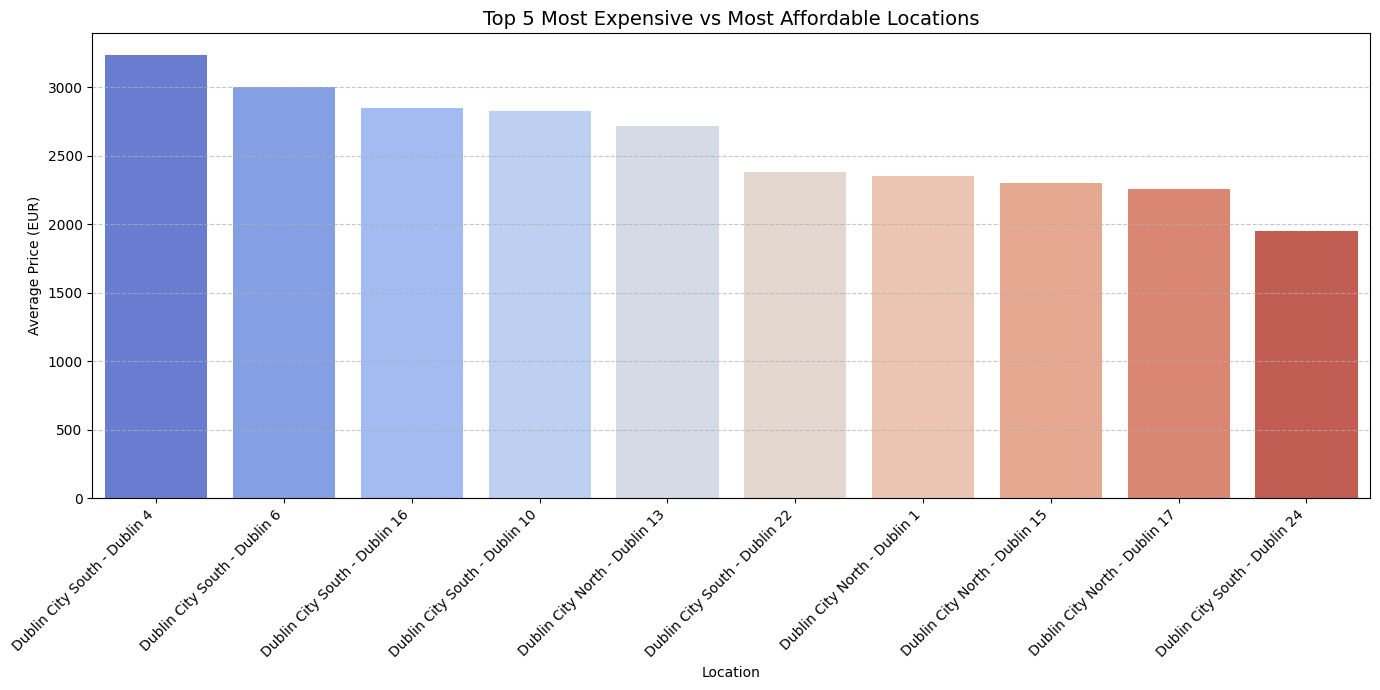


Top 5 Locations with Best Value (Price per Bedroom):
                                      mean  count
Location                                         
Dublin City South - Dublin 6W  1068.718519     45
Dublin City North - Dublin 17  1099.689542     51
Dublin City North - Dublin 15  1110.589080     58
Dublin City North - Dublin 7   1122.719858     47
Dublin City South - Dublin 12  1143.113095     56

INSIGHT: These locations offer the best value for larger properties.


In [18]:
def analyze_location_pricing(data):
    """Analyze pricing variations by location."""
    print("\n===== LOCATION PRICING ANALYSIS =====")
    if 'Location' in data.columns and 'Price' in data.columns:
        loc_price = data.groupby('Location')['Price'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
        print("\nTop 10 Most Expensive Locations:")
        print(loc_price.head(10))
        print("\nTop 10 Most Affordable Locations:")
        print(loc_price.tail(10))
        
        plt.figure(figsize=(14, 7))
        top_bottom = pd.concat([loc_price.head(5), loc_price.tail(5)])
        sns.barplot(x=top_bottom.index, y=top_bottom['mean'], palette='coolwarm')
        plt.title('Top 5 Most Expensive vs Most Affordable Locations', fontsize=14)
        plt.xlabel('Location')
        plt.ylabel('Average Price (EUR)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        print("Location price comparison")
        plt.show("location_price_comparison.png")
        plt.close()
        
        # Affordability Index
        if 'Bedrooms' in data.columns and 'PricePerBedroom' in data.columns:
            loc_ppb = data.groupby('Location')['PricePerBedroom'].agg(['mean', 'count']).sort_values('mean')
            print("\nTop 5 Locations with Best Value (Price per Bedroom):")
            print(loc_ppb.head(5))
            print("\nINSIGHT: These locations offer the best value for larger properties.")

# Call the function
analyze_location_pricing(data)



---

**Cell 13 – Analyze Lease Length Impact Function and Call**




===== LEASE LENGTH IMPACT ANALYSIS =====

Pricing Statistics by Lease Length Group:
                                  mean  median  count
LeaseGroup                                           
Short-Term (<6 months)     3584.889868  3400.0    227
Medium-Term (6-12 months)  2496.741214  2140.0    313
Long-Term (>12 months)     2316.863603  1980.0   1371
Saved lease length price comparison


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3332941194.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lease_price = data.groupby('LeaseGroup')['Price'].agg(['mean', 'median', 'count'])
/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/3332941194.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lease_price.index, y=lease_price['mean'], palette='muted')


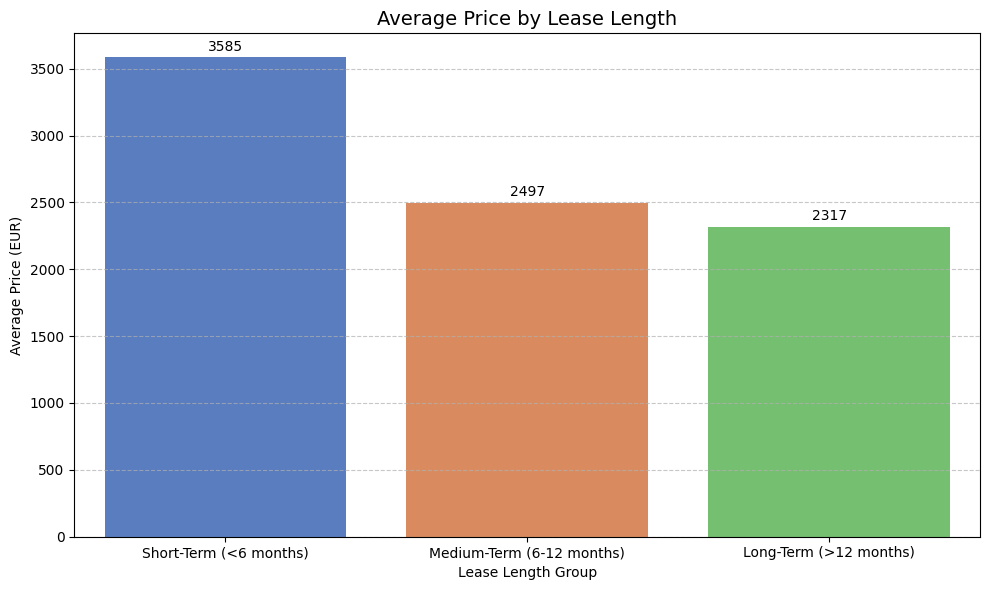


Availability by Lease Length Group:
LeaseGroup
Long-Term (>12 months)       1371
Medium-Term (6-12 months)     313
Short-Term (<6 months)        227
Name: count, dtype: int64

INSIGHT: Short-term leases (<6 months) are 54.7% more expensive on average than long-term leases, suggesting potential savings for renters committing to longer terms.


In [20]:
def analyze_lease_length_impact(data):
    """
    Analyze how lease length affects pricing and availability.
    - 'Lease Length (months)' indicates rental commitment duration.
    - Useful for renters deciding between short-term flexibility vs. long-term stability.
    """
    print("\n===== LEASE LENGTH IMPACT ANALYSIS =====")
    if 'Lease Length (months)' in data.columns and 'Price' in data.columns:
        # Categorize lease lengths into broader buckets for clarity
        bins = [0, 6, 12, float('inf')]
        labels = ['Short-Term (<6 months)', 'Medium-Term (6-12 months)', 'Long-Term (>12 months)']
        data['LeaseGroup'] = pd.cut(data['Lease Length (months)'], bins=bins, labels=labels, right=False)
        
        lease_price = data.groupby('LeaseGroup')['Price'].agg(['mean', 'median', 'count'])
        print("\nPricing Statistics by Lease Length Group:")
        print(lease_price)
        
        # Plot pricing by lease length
        plt.figure(figsize=(10, 6))
        sns.barplot(x=lease_price.index, y=lease_price['mean'], palette='muted')
        plt.title('Average Price by Lease Length', fontsize=14)
        plt.xlabel('Lease Length Group')
        plt.ylabel('Average Price (EUR)')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        for i, v in enumerate(lease_price['mean']):
            plt.text(i, v + 50, f"{v:.0f}", ha='center')
        plt.tight_layout()
        print("Saved lease length price comparison")
        plt.show("lease_length_price.png")
        plt.close()
        
        # Availability by lease length
        lease_counts = data['LeaseGroup'].value_counts()
        print("\nAvailability by Lease Length Group:")
        print(lease_counts)
        
        # Insight
        if 'Short-Term (<6 months)' in lease_price.index and 'Long-Term (>12 months)' in lease_price.index:
            short_term_avg = lease_price.loc['Short-Term (<6 months)', 'mean']
            long_term_avg = lease_price.loc['Long-Term (>12 months)', 'mean']
            diff_pct = ((short_term_avg - long_term_avg) / long_term_avg) * 100
            print(f"\nINSIGHT: Short-term leases (<6 months) are {diff_pct:.1f}% more expensive on average than long-term leases, "
                  f"suggesting potential savings for renters committing to longer terms.")

# Call the function
analyze_lease_length_impact(data)



---

**Cell 14 – Analyze Amenities Impact Function and Call**




===== AMENITIES IMPACT ANALYSIS =====

Pricing Impact of Parking:
                mean  count
Parking                    
No       2237.681053   1367
Yes      3098.953688    583
INSIGHT: Properties with Parking command a 861.27 EUR (38.5%) price premium.
Parking price impact chart as Parking_price_impact.png


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/2226608509.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amenity_price.index, y=amenity_price['mean'], palette='pastel')


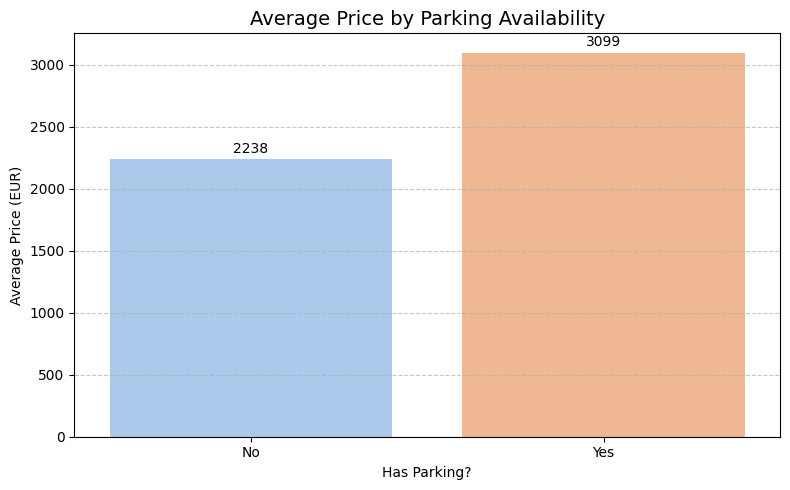


Pricing Impact of Garden:
               mean  count
Garden                    
No      2054.530136   1543
Yes     4165.749386    407
INSIGHT: Properties with Garden command a 2111.22 EUR (102.8%) price premium.
Garden price impact chart as Garden_price_impact.png


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/2226608509.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amenity_price.index, y=amenity_price['mean'], palette='pastel')


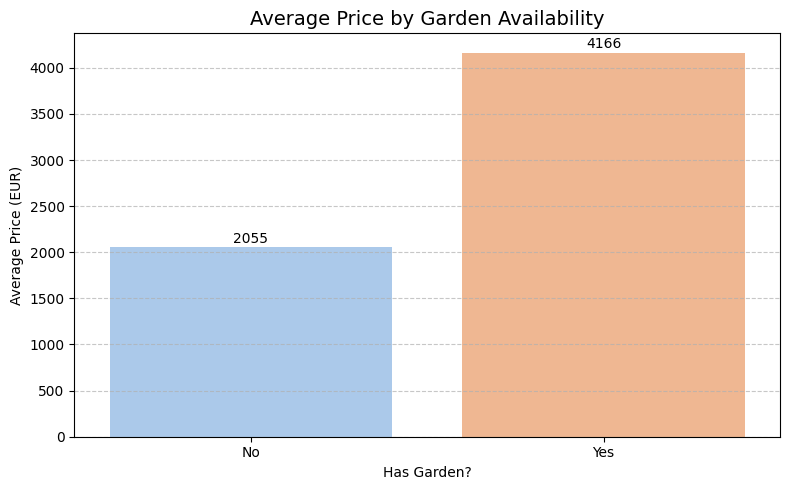

In [21]:
def analyze_amenities_impact(data):
    """
    Analyze how amenities (Parking, Garden) affect pricing and desirability.
    - 'Parking' and 'Garden' are key features that influence rental value.
    - Useful for understanding what drives price premiums in the market.
    """
    print("\n===== AMENITIES IMPACT ANALYSIS =====")
    amenities = ['Parking', 'Garden']
    for amenity in amenities:
        if amenity in data.columns and 'Price' in data.columns:
            # Standardize responses to Yes/No
            data[amenity] = data[amenity].replace({'': 'No'}).fillna('No')
            amenity_price = data.groupby(amenity)['Price'].agg(['mean', 'count'])
            print(f"\nPricing Impact of {amenity}:")
            print(amenity_price)
            
            # Calculate price premium
            if 'Yes' in amenity_price.index and 'No' in amenity_price.index:
                premium = amenity_price.loc['Yes', 'mean'] - amenity_price.loc['No', 'mean']
                premium_pct = (premium / amenity_price.loc['No', 'mean']) * 100
                print(f"INSIGHT: Properties with {amenity} command a {premium:.2f} EUR ({premium_pct:.1f}%) price premium.")
            
            # Plot
            plt.figure(figsize=(8, 5))
            sns.barplot(x=amenity_price.index, y=amenity_price['mean'], palette='pastel')
            plt.title(f'Average Price by {amenity} Availability', fontsize=14)
            plt.xlabel(f'Has {amenity}?')
            plt.ylabel('Average Price (EUR)')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            for i, v in enumerate(amenity_price['mean']):
                plt.text(i, v + 50, f"{v:.0f}", ha='center')
            plt.tight_layout()
            print(f"{amenity} price impact chart as {amenity}_price_impact.png")
            plt.show(f"{amenity}_price_impact.png")
            plt.close()

# Call the function
analyze_amenities_impact(data)



---

**Cell 15 – Analyze Contact Type Function and Call**




===== CONTACT TYPE ANALYSIS =====

Pricing Statistics by Contact Type:
                     mean  median  count
Contact                                 
Estate Agent  2367.443223  2010.0   1365
Owner         2793.230769  2400.0    585
Contact type price comparison as contact_type_price.png


/var/folders/n0/jlkzrfxd5kjb58lgm7cyjy2w0000gn/T/ipykernel_9853/1846298276.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contact_price.index, y=contact_price['mean'], palette='deep')


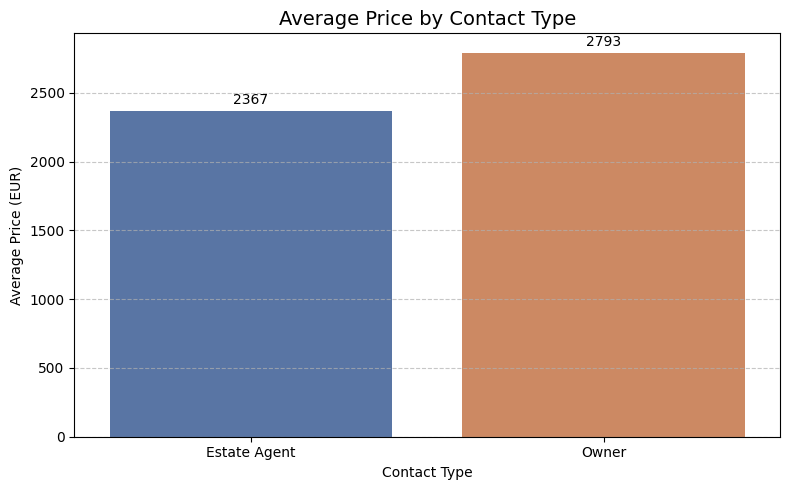


INSIGHT: Estate Agent listings are -425.79 EUR (-15.2%) more expensive on average than Owner listings, possibly due to professional management fees or higher-quality properties.


In [22]:
def analyze_contact_type(data):
    """
    Analyze differences between Estate Agent vs. Owner listings.
    - 'Contact' indicates whether the listing is managed by an agent or owner.
    - Useful for renters to understand pricing and negotiation potential.
    """
    print("\n===== CONTACT TYPE ANALYSIS =====")
    if 'Contact' in data.columns and 'Price' in data.columns:
        contact_price = data.groupby('Contact')['Price'].agg(['mean', 'median', 'count'])
        print("\nPricing Statistics by Contact Type:")
        print(contact_price)
        
        # Plot
        plt.figure(figsize=(8, 5))
        sns.barplot(x=contact_price.index, y=contact_price['mean'], palette='deep')
        plt.title('Average Price by Contact Type', fontsize=14)
        plt.xlabel('Contact Type')
        plt.ylabel('Average Price (EUR)')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        for i, v in enumerate(contact_price['mean']):
            plt.text(i, v + 50, f"{v:.0f}", ha='center')
        plt.tight_layout()
        print("Contact type price comparison as contact_type_price.png")
        plt.show("contact_type_price.png")
        plt.close()
        
        # Insight
        if 'Estate Agent' in contact_price.index and 'Owner' in contact_price.index:
            diff = contact_price.loc['Estate Agent', 'mean'] - contact_price.loc['Owner', 'mean']
            diff_pct = (diff / contact_price.loc['Owner', 'mean']) * 100
            print(f"\nINSIGHT: Estate Agent listings are {diff:.2f} EUR ({diff_pct:.1f}%) more expensive on average than Owner listings, "
                  f"possibly due to professional management fees or higher-quality properties.")

# Call the function
analyze_contact_type(data)



---

Each cell stands alone, uses the same loaded "data" from Cell 1, and calls its respective function immediately after its definition.